<a href="https://www.bigdatauniversity.com"><img src="https://ibm.box.com/shared/static/cw2c7r3o20w9zn8gkecaeyjhgw3xdgbj.png" width="400" align="center"></a>

<h1 align="center"><font size="5">Classification with Python</font></h1>

In this notebook we try to practice all the classification algorithms that we learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Lets first load required libraries:

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### About dataset

This dataset is about past loans. The __Loan_train.csv__ data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |

Lets download the dataset

In [2]:
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

--2020-03-16 14:01:20--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

100%[======================================>] 23,101      --.-K/s   in 0.002s  

2020-03-16 14:01:20 (11.9 MB/s) - ‘loan_train.csv’ saved [23101/23101]



### Load Data From CSV File  

In [3]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [4]:
print(df.shape)

(346, 10)


### Convert to date time object 

In [5]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data visualization and pre-processing



Let’s see how many of each class is in our data set 

In [6]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection 


Lets plot some columns to underestand data better:

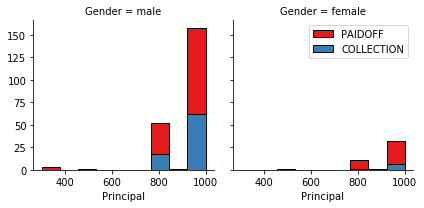

In [7]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

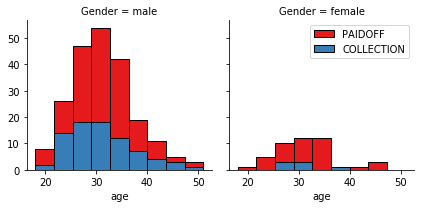

In [8]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction

### Lets look at the day of the week people get the loan 

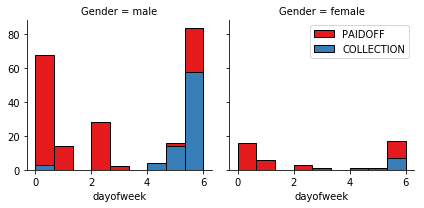

In [9]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

We see that people who get the loan at the end of the week dont pay it off, so lets use Feature binarization to set a threshold values less then day 4 

In [10]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convert Categorical features to numerical values

Lets look at gender:

In [11]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Lets convert male to 0 and female to 1:


In [12]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## One Hot Encoding  
#### How about education?

In [13]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

#### Feature befor One Hot Encoding

In [14]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame 

In [15]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


### Feature selection

Lets defind feature sets, X:

In [16]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


What are our lables?

In [17]:
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

## Normalize Data 

Data Standardization give data zero mean and unit variance (technically should be done after train test split )

In [18]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

# Classification 

Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:
- K Nearest Neighbor(KNN)
- Decision Tree
- Support Vector Machine
- Logistic Regression



__ Notice:__ 
- You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
- You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
- You should include the code of the algorithm in the following cells.

# K Nearest Neighbor(KNN)
Notice: You should find the best k to build the model with the best accuracy.  
**warning:** You should not use the __loan_test.csv__ for finding the best k, however, you can split your train_loan.csv into train and test to find the best __k__.

# Train Test Spilt

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 4)
print("X_Train shape:{}\ny_train shape:{}\nX_test shape:{}\ny_test shape:{}".format(X_train.shape,y_train.shape,X_test.shape,y_test.shape))

X_Train shape:(276, 8)
y_train shape:(276,)
X_test shape:(70, 8)
y_test shape:(70,)


# Applying KNN for values from 1 to 10

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [21]:
K_max = 10
mean_acc = np.zeros((K_max-1))
std_acc = np.zeros((K_max-1))

for n in range(1,K_max):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    y_pred_knn = neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, y_pred_knn)
    std_acc[n-1]=np.std(y_pred_knn==y_test)/np.sqrt(y_pred_knn.shape[0])
    print('Accuracy with K value = {} is {} %'.format(n,mean_acc[n-1]*100))
    
print('\nThe KNN algorithm in this case has best accuracy for K value = {}'.format(mean_acc.argmax()+1))

Accuracy with K value = 1 is 67.14285714285714 %
Accuracy with K value = 2 is 65.71428571428571 %
Accuracy with K value = 3 is 71.42857142857143 %
Accuracy with K value = 4 is 68.57142857142857 %
Accuracy with K value = 5 is 75.71428571428571 %
Accuracy with K value = 6 is 71.42857142857143 %
Accuracy with K value = 7 is 78.57142857142857 %
Accuracy with K value = 8 is 75.71428571428571 %
Accuracy with K value = 9 is 75.71428571428571 %

The KNN algorithm in this case has best accuracy for K value = 7


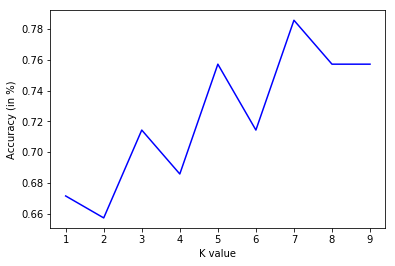

In [22]:
plt.plot(list(np.arange(1,10)),mean_acc,color='blue')
plt.xlabel('K value')
plt.ylabel('Accuracy (in %)')
plt.show()

# Decision Tree

# Applying Decision Tree for the problem

In [23]:
from sklearn.tree import DecisionTreeClassifier

# Training the dataset with different max_depth values

In [24]:
X_trainnew, X_testnew, y_trainnew, y_testnew = train_test_split(X,y,test_size = 0.3,random_state = 4)
dmax = 10
dectree_acc = np.zeros((dmax-1))
for n in range(2,dmax):
    tree_obj = DecisionTreeClassifier(criterion = 'entropy',max_depth = n)
    tree_obj.fit(X_trainnew,y_trainnew)
    y_pred_dec = tree_obj.predict(X_testnew)
    dectree_acc[n-2] = metrics.accuracy_score(y_testnew,y_pred_dec)
    print('The accuracy for max depth = {} is {} %'.format(n,dectree_acc[n-2]*100))
    
print('\nThe Decision Tree Classifier in this case has the best accuracy for max_depth = {}'.format(dectree_acc.argmax()+2))

The accuracy for max depth = 2 is 74.03846153846155 %
The accuracy for max depth = 3 is 74.03846153846155 %
The accuracy for max depth = 4 is 74.03846153846155 %
The accuracy for max depth = 5 is 74.03846153846155 %
The accuracy for max depth = 6 is 74.03846153846155 %
The accuracy for max depth = 7 is 75.0 %
The accuracy for max depth = 8 is 71.15384615384616 %
The accuracy for max depth = 9 is 70.1923076923077 %

The Decision Tree Classifier in this case has the best accuracy for max_depth = 7


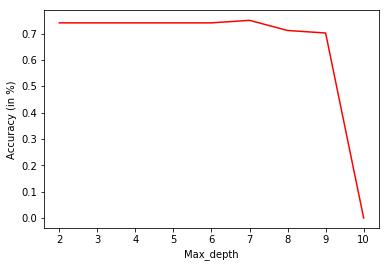

In [25]:
plt.plot(list(np.arange(2,11)),dectree_acc,color='red')
plt.xlabel('Max_depth')
plt.ylabel('Accuracy (in %)')
plt.show()

# Support Vector Machine

# Training the model with SVM

In [26]:
from sklearn.svm import SVC

In [27]:
kernels = ['linear','poly','rbf','sigmoid']

In [28]:
#model with 80% training data size
svm_acc = np.zeros((4))
i=0
for k_name in kernels:
    svc = SVC(kernel = k_name)
    svc.fit(X_train,y_train)
    y_pred_svm = svc.predict(X_test)
    svm_acc[i] = metrics.accuracy_score(y_test,y_pred_svm)
    print('For {} Kernel Function Type:\n'.format(k_name))
    print('\t\t\tClassification Report\n\t\t------------------------------------\n\t\t')
    print(metrics.classification_report(y_test,y_pred_svm))
    print('\t\t\tConfusion Matrix\n\t\t-----------------------------\n\t\t')
    print(metrics.confusion_matrix(y_test,y_pred_svm))
    print('\nAccuracy with {} Kernel type = {} %'.format(k_name,svm_acc[i]*100))
    i = i+1
    print('\n\n\n')

For linear Kernel Function Type:

			Classification Report
		------------------------------------
		
              precision    recall  f1-score   support

  COLLECTION       0.00      0.00      0.00        15
     PAIDOFF       0.79      1.00      0.88        55

   micro avg       0.79      0.79      0.79        70
   macro avg       0.39      0.50      0.44        70
weighted avg       0.62      0.79      0.69        70

			Confusion Matrix
		-----------------------------
		
[[ 0 15]
 [ 0 55]]

Accuracy with linear Kernel type = 78.57142857142857 %




For poly Kernel Function Type:

			Classification Report
		------------------------------------
		
              precision    recall  f1-score   support

  COLLECTION       0.33      0.07      0.11        15
     PAIDOFF       0.79      0.96      0.87        55

   micro avg       0.77      0.77      0.77        70
   macro avg       0.56      0.52      0.49        70
weighted avg       0.69      0.77      0.71        70

			Confusion

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamm

In [29]:
#model with 70% training data size
svm_acc = np.zeros((4))
i=0
for k_name in kernels:
    svc = SVC(kernel = k_name)
    svc.fit(X_trainnew,y_trainnew)
    y_pred_svm2 = svc.predict(X_testnew)
    svm_acc[i] = metrics.accuracy_score(y_testnew,y_pred_svm2)
    print('For {} Kernel Function Type:\n'.format(k_name))
    print('\t\t\tClassification Report\n\t\t------------------------------------\n\t\t')
    print(metrics.classification_report(y_testnew,y_pred_svm2))
    print('\t\t\tConfusion Matrix\n\t\t-----------------------------\n\t\t')
    print(metrics.confusion_matrix(y_testnew,y_pred_svm2))
    print('\nAccuracy with {} Kernel type = {} %'.format(k_name,svm_acc[i]*100))
    i = i+1
    print('\n\n\n')

For linear Kernel Function Type:

			Classification Report
		------------------------------------
		
              precision    recall  f1-score   support

  COLLECTION       0.00      0.00      0.00        27
     PAIDOFF       0.74      1.00      0.85        77

   micro avg       0.74      0.74      0.74       104
   macro avg       0.37      0.50      0.43       104
weighted avg       0.55      0.74      0.63       104

			Confusion Matrix
		-----------------------------
		
[[ 0 27]
 [ 0 77]]

Accuracy with linear Kernel type = 74.03846153846155 %




For poly Kernel Function Type:

			Classification Report
		------------------------------------
		
              precision    recall  f1-score   support

  COLLECTION       0.67      0.07      0.13        27
     PAIDOFF       0.75      0.99      0.85        77

   micro avg       0.75      0.75      0.75       104
   macro avg       0.71      0.53      0.49       104
weighted avg       0.73      0.75      0.67       104

			Confusion

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamm

# Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
reg_par = [1,0.1,0.01,0.5,0.05,0.02,0.2]

In [31]:
acc_dict = {}
for s in solvers:
    for r in reg_par:
        LR_obj = LogisticRegression(C=r,solver=s)
        LR_obj.fit(X_train,y_train)
        y_pred_log = LR_obj.predict(X_test) 
        key = (s,r)
        acc_dict[key] = metrics.accuracy_score(y_test,y_pred_log)
        print("For {} solver and C value = {}, \naccuracy is {} %\nPredicted Probabilities ar:".format(s,r,acc_dict[key]*100))
        print(LR_obj.predict_proba(X_test))
        print('\n\n')

For newton-cg solver and C value = 1, 
accuracy is 72.85714285714285 %
Predicted Probabilities ar:
[[0.51845695 0.48154305]
 [0.38663462 0.61336538]
 [0.02326666 0.97673334]
 [0.03501069 0.96498931]
 [0.02344794 0.97655206]
 [0.02732948 0.97267052]
 [0.45665709 0.54334291]
 [0.41607168 0.58392832]
 [0.03501069 0.96498931]
 [0.45827831 0.54172169]
 [0.03232611 0.96767389]
 [0.45333433 0.54666567]
 [0.0166259  0.9833741 ]
 [0.03995489 0.96004511]
 [0.28127177 0.71872823]
 [0.01012538 0.98987462]
 [0.59966921 0.40033079]
 [0.01876197 0.98123803]
 [0.47386107 0.52613893]
 [0.0268046  0.9731954 ]
 [0.26512923 0.73487077]
 [0.44312578 0.55687422]
 [0.55946084 0.44053916]
 [0.40446269 0.59553731]
 [0.21863961 0.78136039]
 [0.53902491 0.46097509]
 [0.54926365 0.45073635]
 [0.17231646 0.82768354]
 [0.48416207 0.51583793]
 [0.00700316 0.99299684]
 [0.3589193  0.6410807 ]
 [0.32507846 0.67492154]
 [0.42644563 0.57355437]
 [0.40285132 0.59714868]
 [0.22287069 0.77712931]
 [0.32187452 0.67812548]
 

In [32]:
max_acc = max(list(acc_dict.values()))

In [33]:
max_acc

0.7857142857142857

In [34]:
acc_dict

{('newton-cg', 1): 0.7285714285714285,
 ('newton-cg', 0.1): 0.7714285714285715,
 ('newton-cg', 0.01): 0.7857142857142857,
 ('newton-cg', 0.5): 0.7428571428571429,
 ('newton-cg', 0.05): 0.7857142857142857,
 ('newton-cg', 0.02): 0.7857142857142857,
 ('newton-cg', 0.2): 0.7571428571428571,
 ('lbfgs', 1): 0.7285714285714285,
 ('lbfgs', 0.1): 0.7714285714285715,
 ('lbfgs', 0.01): 0.7857142857142857,
 ('lbfgs', 0.5): 0.7428571428571429,
 ('lbfgs', 0.05): 0.7857142857142857,
 ('lbfgs', 0.02): 0.7857142857142857,
 ('lbfgs', 0.2): 0.7571428571428571,
 ('liblinear', 1): 0.7142857142857143,
 ('liblinear', 0.1): 0.7428571428571429,
 ('liblinear', 0.01): 0.6857142857142857,
 ('liblinear', 0.5): 0.7285714285714285,
 ('liblinear', 0.05): 0.7428571428571429,
 ('liblinear', 0.02): 0.7285714285714285,
 ('liblinear', 0.2): 0.7285714285714285,
 ('sag', 1): 0.7285714285714285,
 ('sag', 0.1): 0.7714285714285715,
 ('sag', 0.01): 0.7857142857142857,
 ('sag', 0.5): 0.7428571428571429,
 ('sag', 0.05): 0.7857142

# Observations and Inferences from the above models

After training the model with 4 different ML Algorithms, the following observations were made:
- K-Nearest Neighbors algorithm (KNN) gave better accuracy with k value = 7
- Decision Tree classifier gave a better accuracy with max_depth = 7
- Support Vector Machine algorithm (SVM) gave better accuracy for kernel type "Sigmoid"
- Logistic Regression algorithm gave better accuracies for multiple different parameters, like Newton-CG Solver with C = 0.05/0.02 (or) Saga Solver with C = 0.05/0.02 etc.

**Note: The above observations do not guarantee that the model will work better for other datasets as well**
    

# Model Evaluation using Test set

In [35]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

First, download and load the test set:

In [36]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2020-03-16 14:10:34--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

100%[======================================>] 3,642       --.-K/s   in 0s      

2020-03-16 14:10:34 (358 MB/s) - ‘loan_test.csv’ saved [3642/3642]



### Load Test set for evaluation 

In [93]:
test_df = pd.read_csv('loan_test.csv')
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [94]:
test_df.shape

(54, 10)

In [95]:
test_df['effective_date'] = pd.to_datetime(df['effective_date'])
test_df['due_date'] = pd.to_datetime(df['due_date'])
test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek
test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
feature_set = test_df[['Principal','terms','age','Gender','weekend']]
feature_set = pd.concat([feature_set,pd.get_dummies(test_df['education'])], axis=1)
feature_set.drop(['Master or Above'], axis = 1,inplace=True)
feature_set.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,50,1,0,1,0,0
1,300,7,35,0,0,0,0,0
2,1000,30,43,1,0,0,1,0
3,1000,30,26,0,1,0,0,1
4,800,15,29,0,1,1,0,0


In [96]:
X_final = feature_set
y_final = test_df['loan_status'].values

In [97]:
X_final= preprocessing.StandardScaler().fit(X_final).transform(X_final)
X_final[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


array([[ 0.49362588,  0.92844966,  3.05981865,  1.97714211, -4.12310563,
         2.39791576, -0.79772404, -0.86135677],
       [-3.56269116, -1.70427745,  0.53336288, -0.50578054, -4.12310563,
        -0.41702883, -0.79772404, -0.86135677],
       [ 0.49362588,  0.92844966,  1.88080596,  1.97714211, -4.12310563,
        -0.41702883,  1.25356634, -0.86135677],
       [ 0.49362588,  0.92844966, -0.98251057, -0.50578054,  0.24253563,
        -0.41702883, -0.79772404,  1.16095912],
       [-0.66532184, -0.78854628, -0.47721942, -0.50578054,  0.24253563,
         2.39791576, -0.79772404, -0.86135677]])

In [98]:
y_final[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [99]:
print(X_final.shape)
print(y_final.shape)

(54, 8)
(54,)


# For KNN Algorithm

In [100]:
neigh = KNeighborsClassifier(n_neighbors=7)
neigh.fit(X_train,y_train)
y_final_pred_knn = neigh.predict(X_final)
#print("Accuracy of the model: {} %\n".format(metrics.accuracy_score(y_final_pred_knn,y_final)*100))
print('Jaccard Similarity Index of the Model: {} %\n'.format(metrics.jaccard_similarity_score(y_final_pred_knn,y_final)*100))
print('F1 Score of the Model:{}\n'.format(metrics.f1_score(y_final,y_final_pred_knn,average=None)))
print("\t\t\tClassification Report:\n\t\t-----------------------------------\n\n")
print(metrics.classification_report(y_final_pred_knn,y_final))

Jaccard Similarity Index of the Model: 68.51851851851852 %

F1 Score of the Model:[0.19047619 0.8045977 ]

			Classification Report:
		-----------------------------------


              precision    recall  f1-score   support

  COLLECTION       0.14      0.29      0.19         7
     PAIDOFF       0.88      0.74      0.80        47

   micro avg       0.69      0.69      0.69        54
   macro avg       0.51      0.52      0.50        54
weighted avg       0.78      0.69      0.72        54



# For Decision Tree Classifier

In [101]:
tree_obj = DecisionTreeClassifier(criterion = 'entropy',max_depth = 7)
tree_obj.fit(X_train,y_train)
y_final_pred_dectree = tree_obj.predict(X_final)
#print("Accuracy of the model: {} %\n".format(metrics.accuracy_score(y_final_pred_dectree,y_final)*100))
print('Jaccard Similarity Index of the Model: {} %\n'.format(metrics.jaccard_similarity_score(y_final_pred_dectree,y_final)*100))
print('F1 Score of the Model:{}\n'.format(metrics.f1_score(y_final,y_final_pred_dectree,average=None)))
print("\t\t\tClassification Report:\n\t\t-----------------------------------\n\n")
print(metrics.classification_report(y_final_pred_dectree,y_final))

Jaccard Similarity Index of the Model: 66.66666666666666 %

F1 Score of the Model:[0.25       0.78571429]

			Classification Report:
		-----------------------------------


              precision    recall  f1-score   support

  COLLECTION       0.21      0.30      0.25        10
     PAIDOFF       0.82      0.75      0.79        44

   micro avg       0.67      0.67      0.67        54
   macro avg       0.52      0.53      0.52        54
weighted avg       0.71      0.67      0.69        54



# For SVM Algorithm

In [102]:
svm_obj = SVC(kernel = 'sigmoid')
svm_obj.fit(X_train,y_train)
y_final_pred_svm = svm_obj.predict(X_final)
#print("Accuracy of the model: {} %\n".format(metrics.accuracy_score(y_final_pred_svm,y_final)*100))
print('Jaccard Similarity Index of the Model: {} %\n'.format(metrics.jaccard_similarity_score(y_final_pred_svm,y_final)*100))
print('F1 Score of the Model:{}\n'.format(metrics.f1_score(y_final,y_final_pred_svm,average=None)))
print("\t\t\tClassification Report:\n\t\t-----------------------------------\n\n")
print(metrics.classification_report(y_final_pred_svm,y_final))

Jaccard Similarity Index of the Model: 72.22222222222221 %

F1 Score of the Model:[0.11764706 0.83516484]

			Classification Report:
		-----------------------------------


              precision    recall  f1-score   support

  COLLECTION       0.07      0.33      0.12         3
     PAIDOFF       0.95      0.75      0.84        51

   micro avg       0.72      0.72      0.72        54
   macro avg       0.51      0.54      0.48        54
weighted avg       0.90      0.72      0.80        54



/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


# For Logistic Regression

In [115]:
from sklearn.metrics import log_loss

#For Newton-CG solver and C=0.05
LR_obj = LogisticRegression(solver = 'newton-cg',C = 0.05)
LR_obj.fit(X_train,y_train)
y_final_pred_logreg = LR_obj.predict(X_final)
print('FOR NEWTON-CG SOLVER AND C = 0.05:\n')
#print("Accuracy of the model: {} %\n".format(metrics.accuracy_score(y_final_pred_logreg,y_final)*100))
print('Jaccard Similarity Index of the Model: {} %\n'.format(metrics.jaccard_similarity_score(y_final_pred_logreg,y_final)*100))
print('F1 Score of the Model:{}\n'.format(metrics.f1_score(y_final,y_final_pred_logreg,average=None)))
print("\t\t\tClassification Report:\n\t\t-----------------------------------\n\n")
print(metrics.classification_report(y_final_pred_logreg,y_final))
y_pred_prob_logreg = LR_obj.predict_proba(X_final)
print("Log Loss for the Model:{} %".format(log_loss(y_final,y_pred_prob_logreg*100)))

#For Saga solver and C=0.02
LR_obj = LogisticRegression(solver = 'saga',C = 0.02)
LR_obj.fit(X_train,y_train)
y_final_pred_logreg = LR_obj.predict(X_final)
print('FOR SAGA SOLVER AND C = 0.02:\n')
#print("Accuracy of the model: {} %\n".format(metrics.accuracy_score(y_final_pred_logreg,y_final)*100))
print('Jaccard Similarity Index of the Model: {} %\n'.format(metrics.jaccard_similarity_score(y_final_pred_logreg,y_final)*100))
print('F1 Score of the Model:{}\n'.format(metrics.f1_score(y_final,y_final_pred_logreg,average=None)))
print("\t\t\tClassification Report:\n\t\t-----------------------------------\n\n")
print(metrics.classification_report(y_final_pred_logreg,y_final))
y_pred_prob_logreg = LR_obj.predict_proba(X_final)
print("Log Loss for the Model:{} %".format(log_loss(y_final,y_pred_prob_logreg*100)))

FOR NEWTON-CG SOLVER AND C = 0.05:

Jaccard Similarity Index of the Model: 74.07407407407408 %

F1 Score of the Model:[0.         0.85106383]

			Classification Report:
		-----------------------------------


              precision    recall  f1-score   support

  COLLECTION       0.00      0.00      0.00         0
     PAIDOFF       1.00      0.74      0.85        54

   micro avg       0.74      0.74      0.74        54
   macro avg       0.50      0.37      0.43        54
weighted avg       1.00      0.74      0.85        54

Log Loss for the Model:0.6771451948936323 %
FOR SAGA SOLVER AND C = 0.02:

Jaccard Similarity Index of the Model: 74.07407407407408 %

F1 Score of the Model:[0.         0.85106383]

			Classification Report:
		-----------------------------------


              precision    recall  f1-score   support

  COLLECTION       0.00      0.00      0.00         0
     PAIDOFF       1.00      0.74      0.85        54

   micro avg       0.74      0.74      0.74        5

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/opt/conda/envs/Python3

**Out of the two models in Logistic Regression, Log Loss for newton-cg solver is low and hence it predicts better than the saga solver.**

# Report
You should be able to report the accuracy of the built model using different evaluation metrics:

**Updated Report after building models:**

| Algorithm          | Jaccard | F1-score | LogLoss |
|--------------------|---------|----------|---------|
| KNN                |        | ?        | NA      |
| Decision Tree      | ?       | ?        | NA      |
| SVM                | 0.7222  |         | NA      |
| LogisticRegression | 0.7407  | 0.8510   | 0.6771 |

<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="http://cocl.us/ML0101EN-SPSSModeler">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://cocl.us/ML0101EN_DSX">Watson Studio</a>

<h3>Thanks for completing this lesson!</h3>

<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>

<hr>

<p>Copyright &copy; 2018 <a href="https://cocl.us/DX0108EN_CC">Cognitive Class</a>. This notebook and its source code are released under the terms of the <a href="https://bigdatauniversity.com/mit-license/">MIT License</a>.</p>